In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("mobiletrain.csv")
test=pd.read_csv("mobiletest.csv")

In [3]:
df.isnull().sum().max()
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
df['price_range'].describe()   # 휴대폰 가격대  <-이걸 예측해야함

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

In [5]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

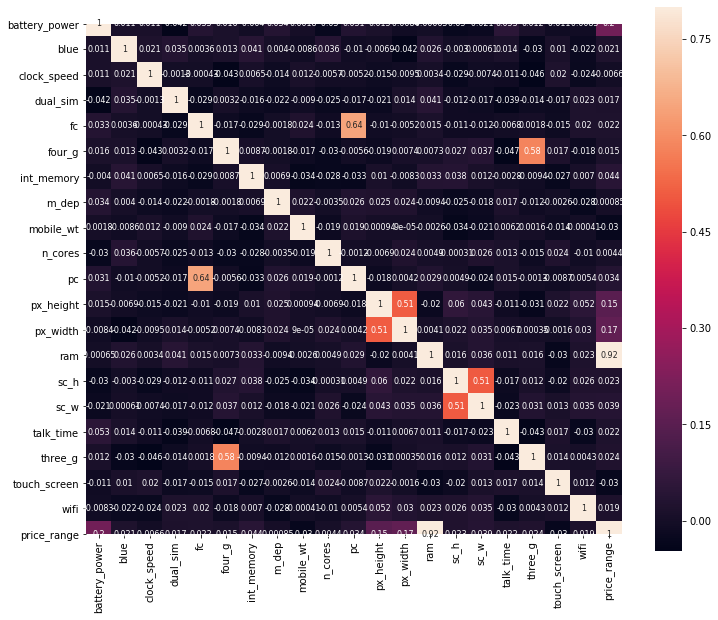

In [6]:
corrmat=df.corr()
corrmat
plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,square=True, vmax=0.8,annot=True,annot_kws={'size':8})

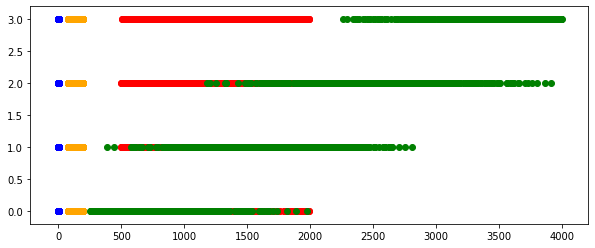

In [7]:
plt.subplots(figsize=(10,4))
plt.scatter(y=df['price_range'], x=df['battery_power'],color='red')
plt.scatter(y=df['price_range'], x=df['ram'],color='green')
plt.scatter(y=df['price_range'], x=df['n_cores'],color='blue')
plt.scatter(y=df['price_range'], x=df['mobile_wt'],color='orange')

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
yt=np.array(df['price_range'])
xt=df.drop(['price_range'],axis=1)
xt=np.array(xt) 
#이 셀은 한번만 실행하기

In [10]:
xt

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [11]:
scaler=MinMaxScaler()
xt=scaler.fit_transform(xt)

In [12]:
xt

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [13]:
xt.shape

(2000, 20)

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(xt,yt, test_size=0.2,random_state=42)

In [15]:
print("shape of x train:",xtrain.shape)
print("shape of x train:"+ str(xtrain.shape))

shape of x train: (1600, 20)
shape of x train:(1600, 20)


In [16]:
#linear SVM을 위한 적절한 C값 검색
"C값이 클수록 train데이터에 대한 score는 올라감"
"test에 대해서는 모름, 무조건 높다고 좋은건 아님"
for thisC in [1,3,5,10,40,60,80,100]:
    svc=SVC(kernel='linear',C=thisC)
    model=svc.fit(xtrain,ytrain)                       #<- model만드는 함수
    scoreTrain=model.score(xtrain,ytrain)
    scoreTest=model.score(xtest,ytest)
    print("선형 SVM:C:{}, training score:{:2f},test score:{:2f}\n".format(thisC,scoreTrain,scoreTest))

선형 SVM:C:1, training score:0.953750,test score:0.960000

선형 SVM:C:3, training score:0.961875,test score:0.977500

선형 SVM:C:5, training score:0.968125,test score:0.975000

선형 SVM:C:10, training score:0.977500,test score:0.967500

선형 SVM:C:40, training score:0.981250,test score:0.962500

선형 SVM:C:60, training score:0.981250,test score:0.962500

선형 SVM:C:80, training score:0.981875,test score:0.970000

선형 SVM:C:100, training score:0.980625,test score:0.967500



In [29]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
model=SVC(kernel='linear',C=20).fit(xtrain,ytrain)                       #<- model만드는 함수
scores=cross_val_score(model,xtrain,ytrain,cv=5)
print("CV점수:" + str(scores))
st_scores=cross_val_score(model,xtrain,ytrain,cv=StratifiedKFold(5,random_state=10,shuffle=True))
print("StratifiedKFold CV 점수:" + str(st_scores))
print("CV 평균점수:" + str(scores.mean()))
print("CV 평균점수:" + str(st_scores.mean()))

CV점수:[0.95015576 0.96261682 0.94392523 0.92789969 0.97169811]
StratifiedKFold CV 점수:[0.97819315 0.92834891 0.93457944 0.97805643 0.96226415]
CV 평균점수:0.9512591238085129
CV 평균점수:0.9562884145205576


In [26]:
from sklearn.svm import LinearSVC
for thisC in [1,3,5,10,20]:
    model2=LinearSVC(C=thisC).fit(xtrain,ytrain)
    
    scoreTrain=model2.score(xtrain,ytrain)
    scoreTest=model2.score(xtest,ytest)
    print("선형 SVM C:{} training score:{}, test score:{}".format(thisC,scoreTrain,scoreTest))

선형 SVM C:1 training score:0.84625, test score:0.84


C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


선형 SVM C:3 training score:0.864375, test score:0.855


C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


선형 SVM C:5 training score:0.866875, test score:0.875


C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


선형 SVM C:10 training score:0.874375, test score:0.8775
선형 SVM C:20 training score:0.87375, test score:0.8775


C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
"LinearSVC(속도빠름),SCV(느림,커널 트릭 지원)"
"실제 작업시 비교하여 사용할 것"

In [ ]:
"RBF 커널 SVM, C와 gamma parameter사용"

In [34]:
for thisGamma in [.1,.25,.5,1]:
    for thisC in [1,5,10,20,40,100]:
        model3=SVC(kernel='rbf',
                   C=thisC,gamma=thisGamma).fit(xtrain,ytrain)
        m3train=model3.score(xtrain,ytrain)
        m3test=model3.score(xtest,ytest)
        print("RBF SVM C:{}, gamma:{}, training score:{:2f},\
        test score:{:2f}".format(thisC,thisGamma,m3train,m3test))

RBF SVM C:1, gamma:0.1, training score:0.928750,        test score:0.902500
RBF SVM C:5, gamma:0.1, training score:0.965000,        test score:0.907500
RBF SVM C:10, gamma:0.1, training score:0.979375,        test score:0.907500
RBF SVM C:20, gamma:0.1, training score:0.990000,        test score:0.912500
RBF SVM C:40, gamma:0.1, training score:0.995000,        test score:0.902500
RBF SVM C:100, gamma:0.1, training score:1.000000,        test score:0.907500
RBF SVM C:1, gamma:0.25, training score:0.959375,        test score:0.887500
RBF SVM C:5, gamma:0.25, training score:0.990000,        test score:0.872500
RBF SVM C:10, gamma:0.25, training score:0.998125,        test score:0.895000
RBF SVM C:20, gamma:0.25, training score:1.000000,        test score:0.902500
RBF SVM C:40, gamma:0.25, training score:1.000000,        test score:0.897500
RBF SVM C:100, gamma:0.25, training score:1.000000,        test score:0.897500
RBF SVM C:1, gamma:0.5, training score:0.980625,        test score:0.835

In [35]:
from sklearn.model_selection import GridSearchCV
param={"C":[1,5,10,20,40,100],
      "gamma":[.1,.25,.5,1]}
GS=GridSearchCV(SVC(kernel='rbf'),param,cv=5)
GS.fit(xtrain,ytrain)
print(GS.best_params_)
print(GS.best_score_)


{'C': 5, 'gamma': 0.1}
0.90375


In [ ]:
test=test.drop(['id'],axis=1)
test

In [49]:
#np.array() 로 array로 만들어줘야 하는 경우가 있음
test=scaler.fit_transform(test)
#test(DF -> array)

In [50]:
test

array([[0.36224149, 1.        , 0.52      , ..., 0.        , 1.        ,
        0.        ],
       [0.22748499, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.87191461, 1.        , 0.92      , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.45697131, 0.        , 0.36      , ..., 1.        , 0.        ,
        0.        ],
       [0.68912608, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.51367578, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [51]:
model=SVC(kernel='rbf', C=5, gamma=.1).fit(xtrain,ytrain)

In [52]:
prediction=model.predict(test)
pred=pd.DataFrame(prediction)
pred

,0
0,3
1,3
2,2
3,3
4,1
...,...
995,2
996,1
997,1
998,2
